In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

#This project deals with two purposes:
# 1) Present an Index to measure the result of the country's macroeconomic performance (MRI), and
# 2) Demonstrate that the real GDP per capita growth rate is a function of the MRI.
#It will work with data from more than 30 countries in a period of 42 years.
#First it will work with advanced economies, the US and Canada.
#Second it is going to be with 15 countries from Latin America, and
#Third, with 23 countries from Europe.

#Advanced economies: 40 countries defined by the International Monetary Fund
#All dataset were provided by the International Monetary Fund
# https://www.imf.org/external/pubs/ft/weo/2019/01/weodata/weoselagr.aspx
#It is also worked with the US and Canadian economies.
#Macroeconomic Result Index (MRI) is an Index developed by Jose Ignacio Diaz Rettali

#This analysis is based on the Macroecnomic Result Index (MRI)
# MRI = (real GDP rate / (inflation rate / unemployment rate)) * 1000
#This index is then related to the real GDP per capita growth rate.

Data = "advecon.csv"
Data1 = "usa.csv"
Data2 = "canada.csv"
dataW = pd.read_csv(Data)
dataW1 = pd.read_csv(Data1)
dataW2 = pd.read_csv(Data2)

#starting with advanced economies

dataW.head()


,year,gdprate,infrate,unemprate,gdppcrate
0,1980,1.320,13.595,5.589,0.658
1,1981,1.991,11.091,6.331,1.179
2,1982,0.223,8.316,7.598,-0.498
3,1983,3.185,5.974,7.918,2.521
4,1984,4.858,6.379,7.505,4.217


In [64]:
#calculating the Macroeconomic Result Index (MRI)

dataW['mri'] = (dataW["gdprate"] / (dataW["infrate"] + dataW["unemprate"])) * 1000
#print(dataW)

dataW.head()


,year,gdprate,infrate,unemprate,gdppcrate,mri
0,1980,1.320,13.595,5.589,0.658,68.807339
1,1981,1.991,11.091,6.331,1.179,114.280794
2,1982,0.223,8.316,7.598,-0.498,14.012819
3,1983,3.185,5.974,7.918,2.521,229.268644
4,1984,4.858,6.379,7.505,4.217,349.899165


In [65]:
statistics = dataW['mri'].describe()
statistics


count     42.000000
mean     239.740770
std      217.166134
min     -696.886760
25%      171.178350
50%      296.046175
75%      347.636980
max      513.367757
Name: mri, dtype: float64

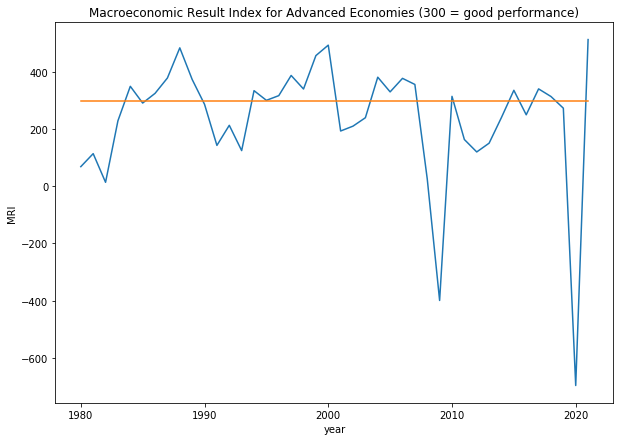

In [66]:
#this is to visualize the MRI index from 1980 to 2020

plt.figure(figsize = (10,7))
x = dataW['year']
y = dataW['mri']
plt.plot(x, y)

plt.xlabel("year")
plt.ylabel("MRI")
plt.title("Macroeconomic Result Index for Advanced Economies (300 = good performance)")

plt.plot([1980, 2021], [300, 300])

plt.show()


Coef. of Corr. MRI vs GDP percapita rate = 0.97


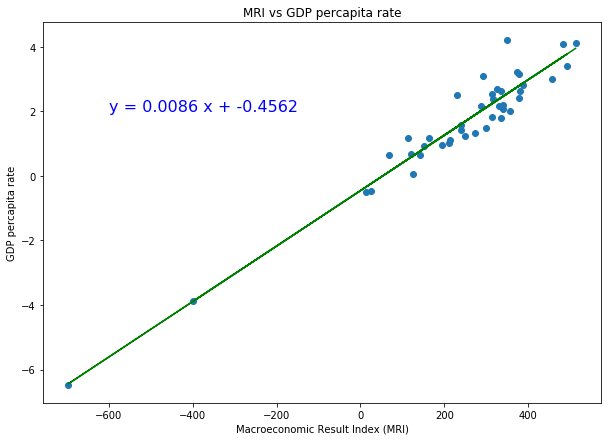

In [67]:
#Relationship between the GDP per capita rate and the MRI
#This is to demonstrate that the GDP per capita rate is a function of the MRI

(slope, intercept, rvalue, pvalue, stderr) = linregress(dataW["mri"], dataW["gdppcrate"])
regressValues = dataW["mri"]* slope + intercept
lineEq = f"y = {round(slope, 4)} x + {round(intercept, 4)}"

# CoefCor = x.corr(y)
print(f"Coef. of Corr. MRI vs GDP percapita rate = {round(rvalue,2)}")

plt.figure(figsize = (10,7))

plt.scatter(dataW["mri"], dataW["gdppcrate"])
plt.plot(dataW["mri"], regressValues, color = "green")
plt.annotate(lineEq,(-600,2), color = "blue", fontsize=16)
plt.xlabel("Macroeconomic Result Index (MRI)")
plt.ylabel("GDP percapita rate")
plt.title("MRI vs GDP percapita rate")

plt.show()


In [68]:
#Regression results for a simple linear regression

from sklearn import linear_model
import statsmodels.api as sm

x = dataW['mri']
y = dataW['gdppcrate']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              gdppcrate   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     575.1
Date:                Mon, 19 Oct 2020   Prob (F-statistic):           2.36e-25
Time:                        18:01:44   Log-Likelihood:                -29.282
No. Observations:                  42   AIC:                             62.56
Df Residuals:                      40   BIC:                             66.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4562      0.115     -3.960      0.000      -0.689      -0.223
mri            0.0086      0.000     23.982      0.000       0.008       0.009
==============================================================================
Omnibus:                       14.752   Durbin-Watson:                   0.694
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.552
Skew:                           1.232   Prob(JB):                     0.000255
Kurtosis:                       4.839   Cond. No.                         482.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

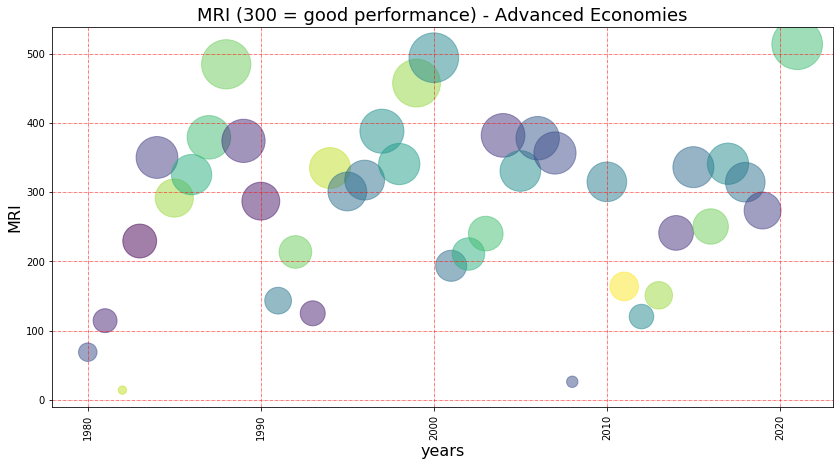

In [70]:

#Working with the bubble plot
x = dataW['year']
y = dataW['mri']
area = y * 5
#The number 5 define the size of the buble
N = dataW['year'].count()
colors = np.random.rand(N)

plt.figure(figsize = (14,7))
#plt.ylim(0, 350000)

df = pd.DataFrame({
    'X':x,
    'Y':y,
    'Colors': colors,
    "bubble_size":area
})
plt.scatter('X', 'Y',
            s='bubble_size',
            c='Colors',
            alpha = 0.5,
            data = df)

plt.title("MRI (300 = good performance) - Advanced Economies", size = 18)
plt.xlabel("years", size = 16)
plt.ylabel("MRI", size = 16)
plt.xticks(rotation = 90)
plt.grid(color = 'red', linestyle = '-.', linewidth = 0.5)

plt.show()



In [71]:
# Now the analysis about USA

dataW1.head()


,year,gdprate,infrate,unemprate,gdppcrate
0,1980,-0.257,13.502,7.175,-1.405
1,1981,2.538,10.378,7.617,1.515
2,1982,-1.802,6.158,9.708,-2.738
3,1983,4.584,3.160,9.600,3.638
4,1984,7.237,4.368,7.508,6.302


In [72]:
#calculating the Macroeconomic Result Index (MRI)

dataW1['mri'] = (dataW1["gdprate"] / (dataW1["infrate"] + dataW1["unemprate"])) * 1000
#print(dataW)

dataW1.head()


,year,gdprate,infrate,unemprate,gdppcrate,mri
0,1980,-0.257,13.502,7.175,-1.405,-12.429269
1,1981,2.538,10.378,7.617,1.515,141.039178
2,1982,-1.802,6.158,9.708,-2.738,-113.576201
3,1983,4.584,3.160,9.600,3.638,359.247649
4,1984,7.237,4.368,7.508,6.302,609.380263


In [73]:
statistics = dataW1['mri'].describe()
statistics


count     42.000000
mean     298.591369
std      249.068177
min     -537.978142
25%      211.966656
50%      349.938617
75%      433.097828
max      741.497660
Name: mri, dtype: float64

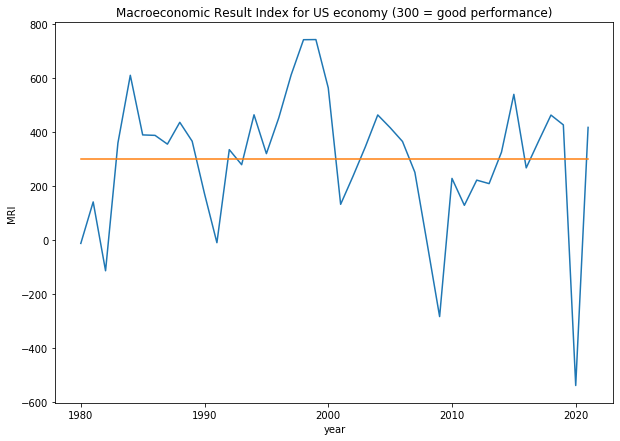

In [74]:
#this is to visualize the MRI index from 1980 to 2020

plt.figure(figsize = (10,7))
x = dataW1['year']
y = dataW1['mri']
plt.plot(x, y)

plt.xlabel("year")
plt.ylabel("MRI")
plt.title("Macroeconomic Result Index for US economy (300 = good performance)")

plt.plot([1980, 2021], [300, 300])

plt.show()


Coef. of Corr. MRI vs GDP percapita rate = 0.92


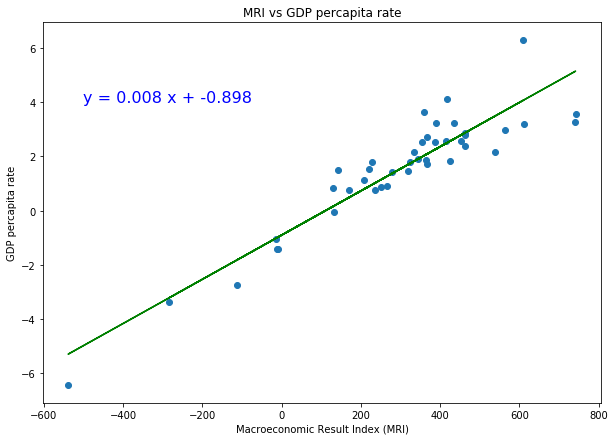

In [75]:
#Relationship between the GDP per capita rate and the MRI
#This is to demonstrate that the GDP per capita rate is a function of the MRI

(slope, intercept, rvalue, pvalue, stderr) = linregress(dataW1["mri"], dataW1["gdppcrate"])
regressValues = dataW1["mri"]* slope + intercept
lineEq = f"y = {round(slope, 3)} x + {round(intercept, 3)}"

# CoefCor = x.corr(y)
print(f"Coef. of Corr. MRI vs GDP percapita rate = {round(rvalue,2)}")

plt.figure(figsize = (10,7))

plt.scatter(dataW1["mri"], dataW1["gdppcrate"])
plt.plot(dataW1["mri"], regressValues, color = "green")
plt.annotate(lineEq,(-500,4), color = "blue", fontsize=16)
plt.xlabel("Macroeconomic Result Index (MRI)")
plt.ylabel("GDP percapita rate")
plt.title("MRI vs GDP percapita rate")

plt.show()


In [76]:
#Regression results for a simple linear regression

from sklearn import linear_model
import statsmodels.api as sm

x = dataW1['mri']
y = dataW1['gdppcrate']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              gdppcrate   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     235.6
Date:                Mon, 19 Oct 2020   Prob (F-statistic):           2.32e-18
Time:                        18:03:22   Log-Likelihood:                -51.597
No. Observations:                  42   AIC:                             107.2
Df Residuals:                      40   BIC:                             110.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8981      0.205     -4.370      0.000      -1.313      -0.483
mri            0.0082      0.001     15.350      0.000       0.007       0.009
==============================================================================
Omnibus:                        2.100   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.350   Jarque-Bera (JB):                1.135
Skew:                           0.313   Prob(JB):                        0.567
Kurtosis:                       3.506   Cond. No.                         608.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

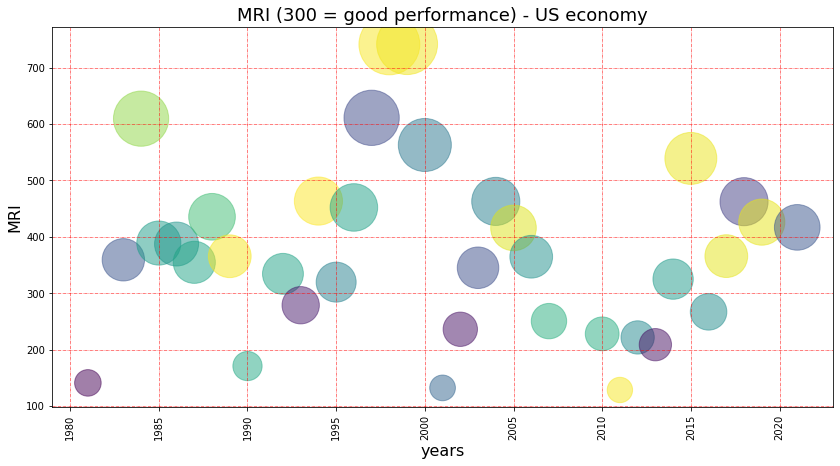

In [78]:
#Working with the bubble plot
x = dataW1['year']
y = dataW1['mri']
area = y * 5
#The number 5 define the size of the buble
N = dataW1['year'].count()
colors = np.random.rand(N)

plt.figure(figsize = (14,7))
#plt.ylim(0, 350000)

df = pd.DataFrame({
    'X':x,
    'Y':y,
    'Colors': colors,
    "bubble_size":area
})
plt.scatter('X', 'Y',
            s='bubble_size',
            c='Colors',
            alpha = 0.5,
            data = df)

plt.title("MRI (300 = good performance) - US economy", size = 18)
plt.xlabel("years", size = 16)
plt.ylabel("MRI", size = 16)
plt.xticks(rotation = 90)
plt.grid(color = 'red', linestyle = '-.', linewidth = 0.5)

plt.show()


In [79]:
# Now the analysis about Canada

dataW2.head()


,year,gdprate,infrate,unemprate,gdppcrate
0,1980,2.163,10.183,7.517,0.908
1,1981,3.503,12.462,7.617,2.192
2,1982,-3.187,10.803,11.100,-4.339
3,1983,2.601,5.816,12.000,1.577
4,1984,5.908,4.339,11.375,4.911


In [80]:
#calculating the Macroeconomic Result Index (MRI)

dataW2['mri'] = (dataW2["gdprate"] / (dataW2["infrate"] + dataW2["unemprate"])) * 1000
#print(dataW)

dataW2.head()


,year,gdprate,infrate,unemprate,gdppcrate,mri
0,1980,2.163,10.183,7.517,0.908,122.203390
1,1981,3.503,12.462,7.617,2.192,174.460880
2,1982,-3.187,10.803,11.100,-4.339,-145.505182
3,1983,2.601,5.816,12.000,1.577,145.992366
4,1984,5.908,4.339,11.375,4.911,375.970472


In [81]:
statistics = dataW2['mri'].describe()
statistics


count     42.000000
mean     210.386850
std      235.561227
min     -770.163286
25%      145.116930
50%      240.266385
75%      338.725968
max      555.041926
Name: mri, dtype: float64

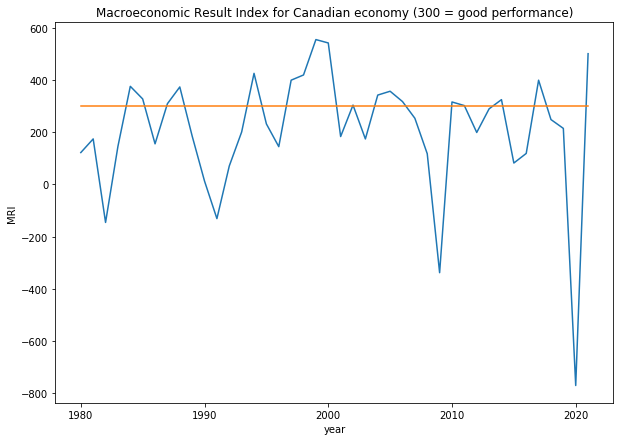

In [82]:
#this is to visualize the MRI index from 1980 to 2020

plt.figure(figsize = (10,7))
x = dataW2['year']
y = dataW2['mri']
plt.plot(x, y)

plt.xlabel("year")
plt.ylabel("MRI")
plt.title("Macroeconomic Result Index for Canadian economy (300 = good performance)")

plt.plot([1980, 2021], [300, 300])

plt.show()


Coef. of Corr. MRI vs GDP percapita rate = 0.95


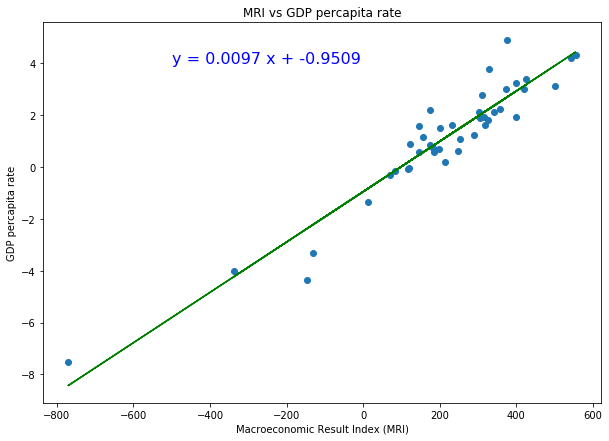

In [83]:
#Relationship between the GDP per capita rate and the MRI
#This is to demonstrate that the GDP per capita rate is a function of the MRI

(slope, intercept, rvalue, pvalue, stderr) = linregress(dataW2["mri"], dataW2["gdppcrate"])
regressValues = dataW2["mri"]* slope + intercept
lineEq = f"y = {round(slope, 4)} x + {round(intercept, 4)}"

# CoefCor = x.corr(y)
print(f"Coef. of Corr. MRI vs GDP percapita rate = {round(rvalue,2)}")

plt.figure(figsize = (10,7))

plt.scatter(dataW2["mri"], dataW2["gdppcrate"])
plt.plot(dataW2["mri"], regressValues, color = "green")
plt.annotate(lineEq,(-500,4), color = "blue", fontsize=16)
plt.xlabel("Macroeconomic Result Index (MRI)")
plt.ylabel("GDP percapita rate")
plt.title("MRI vs GDP percapita rate")

plt.show()


In [84]:
#Regression results for a simple linear regression

from sklearn import linear_model
import statsmodels.api as sm

x = dataW2['mri']
y = dataW2['gdppcrate']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              gdppcrate   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     364.5
Date:                Mon, 19 Oct 2020   Prob (F-statistic):           1.05e-21
Time:                        18:05:34   Log-Likelihood:                -47.435
No. Observations:                  42   AIC:                             98.87
Df Residuals:                      40   BIC:                             102.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9509      0.160     -5.959      0.000      -1.273      -0.628
mri            0.0097      0.001     19.092      0.000       0.009       0.011
==============================================================================
Omnibus:                        5.196   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                4.410
Skew:                           0.457   Prob(JB):                        0.110
Kurtosis:                       4.297   Cond. No.                         423.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

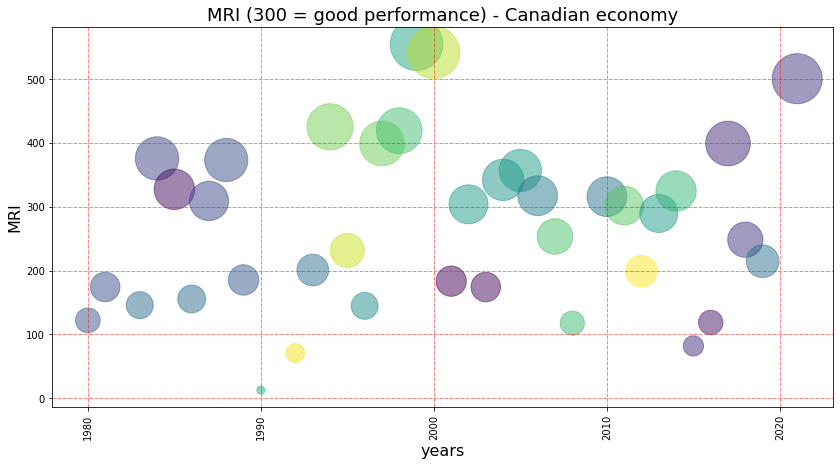

In [86]:
#Working with the bubble plot
x = dataW2['year']
y = dataW2['mri']
area = y * 5
#The number 5 define the size of the buble
N = dataW2['year'].count()
colors = np.random.rand(N)

plt.figure(figsize = (14,7))
#plt.ylim(-780, 560)

df = pd.DataFrame({
    'X':x,
    'Y':y,
    'Colors': colors,
    "bubble_size":area
})
plt.scatter('X', 'Y',
            s='bubble_size',
            c='Colors',
            alpha = 0.5,
            data = df)

plt.title("MRI (300 = good performance) - Canadian economy", size = 18)
plt.xlabel("years", size = 16)
plt.ylabel("MRI", size = 16)
plt.xticks(rotation = 90)
plt.grid(color = 'red', linestyle = '-.', linewidth = 0.5)

plt.show()
